# Разбор 1 контрольной по вычислительной математике

## Задание 1

Построить интерполянт 2 степени с наименьшей ошибкой интерполяции для функции $f(x) = sinx$ на отрезке $[0;5]$. 

### Решение

Известно, что интерполянт с наименьшей ошибкой - интерполянт, узлы которого совпадают с корнями полнома Чебышева.

Поскольку необходимо построить интерполянт 2 степени, то необходимо 3 узла.

Приведенный полином Чебышева третей степени на отрезке $[-1; 1]$ имеет вид:

$$
T_{3,  [-1,1]}(x) = x^3 - \frac{3}{4}x
$$

Корни полинома $x_i$:

$$
x_1 = -\frac{\sqrt{3}}{2}\\
x_2 = 0\\
x_3 = \frac{\sqrt{3}}{2}
$$

Формула для преобразования корней полинома Чебышева на отрезок $[a,b]$:

$$
y_i = \frac{1}{2} (a + b) + \frac{1}{2}(b - a) x_i
$$

где $y_i$ - корни полинома Чебышева на отрезке $[a,b]$.

Сам приведенный полином чебышева при этом:

$$
T_{3,  [a,b]}(y) = \frac{(b-a)^3}{2^{2* 3-1}} cos\left( 3 arccos\frac{2y - (b+a)}{b-a}\right)
$$

Более общая формула для полинома степени $k$:

$$
T_{k,  [a,b]}(y) = \frac{(b-a)^k}{2^{2k-1}} cos\left(k  arccos\frac{2y - (b+a)}{b-a}\right)
$$

Таким образом, искомые узлы:


$$
y_1 = 2.5 -\frac{5\sqrt{3}}{4}\\
y_2 = 2.5\\
y_3 = 2.5 + \frac{5\sqrt{3}}{4}
$$

Для построения интерполнятна можно воспользоваться интерполянтом в форме Лагранжа:

$$
I(y) = f(y_1) \frac{(y-y_2)(y-y_3)}{(y_1 - y_2)(y_1 - y_3)} + f(y_2) \frac{(y-y_1)(y-y_3)}{(y_2 - y_1)(y_2 - y_3)} + f(y_3) \frac{(y-y_1)(y-y_2)}{(y_3 - y_1)(y_3 - y_2)}
$$

Для оценки ошибки вопспользуемся формулой остаточного члена интерполяции:

$$
f(y) - I(y) = \frac{f^{(2+1)}(\xi)}{(2+1)!} \omega(y)\\
\omega(y) = (y - y_1) (y - y_2) (y - y_3)\\
\xi \in (a, b)
$$

Если в качестве узлов интерполяции  выбраны корни полинома Чебышева, то

$$
\omega(y) = T_{3, [a,b]}(y)
$$

причем,

$$
|T_{3, [a,b]}(y)| \le \frac{5^3}{2^{6-1}} = \frac{125}{32}, y \in [a, b]
$$

Тогда ошибку можно оценить:

$$
|f(y) - I(y)| \le \frac{|f^{(2+1)}(\xi)|}{(2+1)!} \frac{125}{32} \le \frac{125 M}{192}
$$

где M - максимум модуля третьей производной функции на отрезке $[a, b]$. Учитывая, что M = 1, получим:

$$
|f(y) - I(y)| \le \frac{125}{192}
$$

Реализуем в коде:

Узлы интерполяции:  [0.33493649 2.5        4.66506351]
-0.199158982067505*x**2 + 0.689201236915084*x + 0.120212689738154


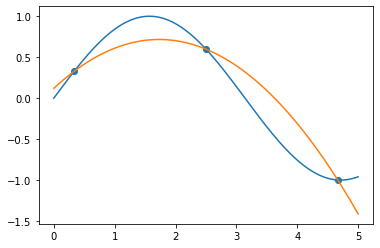

In [18]:
import numpy as np
from sympy import symbols, simplify
import matplotlib.pyplot as plt

def build_interpolator(nodes, func):
    P = 0
    x = symbols("x")
    for k in range(len(nodes)):
        l = 1
        for i in range(len(nodes)):
            if i != k:
                l *= (x - nodes[i]) / (nodes[k] - nodes[i])
        P += l * func(nodes[k])
    return simplify(P), x

def func(x):
    return np.sin(x)

nodes = np.array([-3**0.5 / 2, 0, 3**0.5 / 2])
a, b = 0, 5
nodes = (b + a) / 2 + (b - a) / 2 * nodes
print("Узлы интерполяции: ", nodes)
interpolator, x = build_interpolator(nodes, func)
print(interpolator)

x_array = np.linspace(0, 5, 1000)
y_interp = np.zeros_like(x_array)
for index, x_elem in enumerate(x_array):
    y_interp[index] = interpolator.subs(x, x_elem)

plt.scatter(nodes, func(nodes))
plt.plot(x_array, func(x_array))
plt.plot(x_array, y_interp)





    

## Задание 2

Построить квадратуру Гаусса для произвольной функции на отрезке $[-3, 1]$, используя три корня полинома Лежандра. Вычислить интеграл от функции $f(x) = x^3 + 5x^2 + 10x + 4.5$ при помощи квадратуры. Оценить ошибку интегрирования.

### Решение

Полином лежандра третьей степни имеет вид:
    
$$
L_{3, [-1,1]} (x)= \frac{1}{2} (5x^3 - 3x)
$$

Корни полинома:

$$
x_1 = -\sqrt{\frac{3}{5}}\\
x_2 = 0\\
x_3 = \sqrt{\frac{3}{5}}\\
$$

Корни полинома $y_1, y_2, y_3$ на произвольном отрезке $[a,b]$ задаются:

$$
y_i = \frac{1}{2} (a + b) + \frac{1}{2}(b - a) x_i
$$

Конкретно:

$$
y_1 = -1 - 2 \sqrt{\frac{3}{5}}\\
y_2 = -1\\
y_3 = -1 + 2 \sqrt{\frac{3}{5}}\\
$$

Для построения квадратуры Гаусса приблизим функцию интерполянтом Лагранжа, узлы которого совпадают с узлами полинома Лежандра:

$$
P(y) = \sum_{i=1}^{3} f(y_i) \phi_i(y)\\
\phi_1(y) = \frac{(y - y_2)(y - y_3)}{(y_1 - y_2)(y_1 - y_3)}\\
\phi_2(y) = \frac{(y - y_1)(y - y_3)}{(y_2 - y_1)(y_2 - y_3)}\\
\phi_3(y) = \frac{(y - y_1)(y - y_2)}{(y_3 - y_1)(y_3 - y_2)}\\
$$

Квадратура будет выглядеть следующим образом:

$$
I \approx \int_{-3}^{1} \sum_{i=1}^{3} f(y_i) \phi_i(y) dy = \\
\sum_{i=1}^{3} f(y_i) \int_{-3}^{1}\phi_i(y) dy
$$

Стоит отметить, что квадратуры Гаусса порядка $n$ точны для полиномов степени $2n-1$. Это означает, что значение интеграла от полинома степени не выше $2n-1$ совпадает с аналитическим расчетом. Значит, вычисление интеграла от полинома степни 3 совпадет с точным значением интеграла.



In [12]:
import numpy as np
from sympy import symbols, simplify, integrate
import matplotlib.pyplot as plt

def build_interpolator(nodes):
    P = 0
    x = symbols("x")
    for k in range(len(nodes)):
        l = 1
        for i in range(len(nodes)):
            if i != k:
                l *= (x - nodes[i]) / (nodes[k] - nodes[i])
        f = symbols("f_" + str(k))
        P += l * f
    return simplify(P), x

x = np.array([-(3 / 5)**0.5, 0, (3 / 5)**0.5])
a, b = -3, 1
y = (b + a) / 2 + (b - a) / 2 * x

print("Узлы квадратуры: ", y)

interpolator, x_var = build_interpolator(y)
q = integrate(interpolator, (x_var, -3, 1))
print("Квадратура Гаусса: ", q)



Узлы квадратуры:  [-2.54919334 -1.          0.54919334]
Квадратура Гаусса:  1.11111111111111*f_0 + 1.77777777777778*f_1 + 1.11111111111111*f_2


## Задание 3

Для функции заданной таблично найти значение 1-ой производной в точке $x_0 = 0.47$  c максимальным порядком точности. Обязательно привести таблицу разделенных разностей!


|  x  |0.1  | 0.3 | 0.42| 0.5 | 0.73|
| --- | --- | --- | --- | --- | --- |
|  y  |0.0  |-3.1 | 1.6 |1.45 |2.34 |

### Решение

Построим интерполянт Ньютона $I(x)$ функции $f(x)$, заданной таблично. Узлы интерполяции обозначим как $x_1, x_2, x_3, x_4, x_5$, а значение функции в этих узлах -$y_1, y_2, y_3, y_4, y_5$.
Справедливо равенство:

$$
f(x) = I(x) + R(x)
$$

$R(x)$ - остаточный член интерполяции:

$$
R(x) = \frac{f^{(5)}(\xi)}{5!} \omega(x)\\
\omega(x) = (x - x_1)(x - x_2)(x - x_3)(x - x_4)(x - x_5)\\
\xi \in [x_1, x_5]
$$

Дифференцируя обе части, получим:

$$
f'(x) = I'(x) + R'(x)
$$

Конкретно в точке $x_0$:

$$
f'(x_0) = I'(x_0) + R'(x_0)\\
|R'(x_0)| \le \frac{M}{5!} |\omega'(x_0)|\\
M = \max_{[x_1, x_5]}|f(x)|
$$

Если весь интервал интерполяции обозначить за $h$, то получим, что:

$$
|\omega'(x_0)| \le C_1 h^4\\
$$

А это означает, что:

$$
|R'(x_0)| \le C h^4\\
$$

То есть, порядок аппроксимации производной при помощи интерполяции является четвертым. В этом случае это наибольший возможный порядок. Осталось построить разделенные разности, рассчитать интерполяционный полином и вычислить его производную в точке x_0.

Разделенные разности:

In [27]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify, diff

def diff_matrix(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j-1] - coef[i][j - 1]) / (x[i + j] - x[i])
    return coef

x_array = np.array([0.1, 0.3, 0.42, 0.5, 0.73])
y_array = np.array([0.0, -3.1, 1.6, 1.45, 2.34])

pd.DataFrame(diff_matrix(x_array, y_array))

,0,1,2,3,4
0,0.00,-15.500000,170.833333,-940.104167,2318.139463
1,-3.10,39.166667,-205.208333,520.323695,0.000000
2,1.60,-1.875000,18.530856,0.000000,0.000000
3,1.45,3.869565,0.000000,0.000000,0.000000
4,2.34,0.000000,0.000000,0.000000,0.000000


Построим полином:

In [29]:
coeffs = diff_matrix(x_array, y_array)[0, :]
x = symbols("x")

tmp = 1

P = 0
for i  in range(len(coeffs)):
    P += coeffs[i] * tmp
    tmp *= (x - x_array[i])

P = simplify(P)

print("Интерполяционный полином: ", P)

P_der = diff(P)
print("Производная полинома: ", P_der)

results = P_der.subs(x, 0.47)
print("Производная в точке: ", results)

    

Интерполяционный полином:  2318.13946304899*x**4 - 4000.04825789134*x**3 + 2351.14754353379*x**2 - 528.678322409601*x + 33.1245911172087
Производная полинома:  9272.55785219597*x**3 - 12000.144773674*x**2 + 4702.29508706757*x - 528.678322409601
Производная в точке:  -6.72683810388708


## Задание 4

На приведенном шаблоне из трех точек $(x_{i-0.5}, x_i, x_{i+1}) = (x_i - h/2, x_i, x_i + h)$ с помощью метода неопределенных коэффициентов построить аппроксимацию первой производной функции в точке $x_{i-0.5}$ с наибольшим возможным порядком. Выписать формулу для оптимального шага дифференцирования.

### Решение

Разложим функцию в точках $x_i, x_{i+1}$ с центром в точке $x_{i-0.5}$:

$$
f(x_i) = f(x_{i-0.5}) + f'(x_{i-0.5}) \frac{h}{2} + f''(x_{i-0.5}) \frac{h^2}{8} + f'''(\xi_1) \frac{h^3}{48}\\
f(x_{i+1}) = f(x_{i-0.5}) + f'(x_{i-0.5}) \frac{3h}{2} + f''(x_{i-0.5}) \frac{9h^2}{8} + f'''(\xi_1) \frac{27h^3}{48}
$$

Пусть $A, B, C$ - коэффициенты при $f(x_{i-0.5}), f(x_{i}), f(x_{i+1})$ соответственно, тогда:

$$
A f(x_{i-0.5}) + B f(x_{i}) + C f(x_{i+1}) =\\
= A f(x_{i-0.5}) + B \left(f(x_{i-0.5}) + f'(x_{i-0.5}) \frac{h}{2} + f''(x_{i-0.5}) \frac{h^2}{8} + f'''(\xi_1) \frac{h^3}{48}\right) +\\
+ C\left(f(x_{i-0.5}) + f'(x_{i-0.5}) \frac{3h}{2} + f''(x_{i-0.5}) \frac{9h^2}{8} + f'''(\xi_2) \frac{27h^3}{48}\right) = \\
= f(x_{i-0.5}) ( A + B + C) + \\
+ f'(x_{i-0.5}) \left(B \frac{h}{2} + C \frac{3h}{2}\right) + \\
+ f''(x_{i-0.5}) \left(B \frac{h^2}{8} + C\frac{9h^2}{8}\right) + \\
+ B f'''(\xi_1) \frac{h^3}{48} + C f'''(\xi_2) \frac{9h^3}{16}
$$

где

$$
\xi_1 \in (x_{i-0.5}, x_i)\\
\xi_2 \in (x_{i-0.5}, x_{i + 1})\\
$$

Для аппроксимации первой производной со вторым порядком необходимо и достаточно удовлетворение системы уравнений:

$$
A + B + C = 0\\
B \frac{h}{2} + C \frac{3h}{2} = 1\\
B \frac{h^2}{8} + C\frac{9h^2}{8} = 0
$$

Решение этой системы:

$$
A = -\frac{8}{3h}\\
B = \frac{3}{h}\\
C = - \frac{1}{3h}
$$

При подстановке коэффициентов в линейную комбинацию получаем:

$$
-\frac{8}{3h} f(x_{i-0.5}) + \frac{3}{h} f(x_{i}) + - \frac{1}{3h} f(x_{i+1}) =\\
= f'(x_{i-0.5}) + f'''(\xi_1) \frac{h^2}{16} - f'''(\xi_2) \frac{3h^2}{16}
$$

Что свидетельствует о втором порядке аппроксимации.

Оценим ошибку метода:

$$
E_{метода} \le M \frac{h^2}{4} \\
M = \max_{[x_{i-0.5}, x_{i + 1}]} |f'''(x)|
$$

Если считать, что функция вычисляется с некоторой ошибкой $\epsilon$, то ошибку вычисления можно оценить как:

$$
E_{выч} \le \frac{8\epsilon + 9\epsilon + \epsilon}{3h} = \frac{6\epsilon}{h}
$$

Таким образом, суммарная ошибка:

$$
E = M \frac{h^2}{4} + \frac{6\epsilon}{h}
$$

Оптимальный шаг можно получить, приравняв выражение для производной по $h$ к нулю:

$$
M \frac{h}{2} -\frac{6\epsilon}{h^2} = 0\\
h = \sqrt[3]{\frac{12\epsilon}{M}}
$$

## Задание 5

Известно, что уравнение $e^x = 3x^2$ имеет корень вблизи $x_0$ = 0.91. Для его нахождения предлагаются методы:

$$
1) x_{n+1} = 2 ln(\sqrt{3}x_{n})\\
2 ) x_{n+1} = \sqrt{\frac{e^{x_n}}{3}}\\
$$

Для каждого из методов оценить количество итераций, необходимое для уменьшения ошибки в $10^3$


### Решение

Исследуем на сходимость первый метод. Для сходимости достаточно, чтобы в окрестности корня, откуда берется начальное приближение, производная правой части метода была по абсолютной величине меньше 1.

$$
f(x) = 2 ln(\sqrt{3}x) = \frac{2}{3}ln3 + 2 ln(x)\\
f'(x) = \left(2 ln(\sqrt{3}x)\right)' = \frac{2}{x}\\
f'(x_0) = \frac{2}{0.91} > 1
$$

Поэтому первый метод не обязательно сходится (заметим, что условие, изложенное выше, строго не является необходимым)

Аналогично исследуем второй метод:

$$
f(x) = \sqrt{\frac{e^{x}}{3}} = \frac{e^{x/2}}{\sqrt{3}}\\
f'(x) = \left(\frac{e^{x/2}}{\sqrt{3}}\right)' = \frac{e^{x/2}}{2\sqrt{3}}\\
f'(x_0) = \frac{e^{0.91/2}}{2\sqrt{3}}\approx 0.455 < 1
$$

Значит, первый метод сходится.

Если каждую итерацию ошибка в решении сокращается в 0.455 раз, то для необходимого количества итераций можно получить:

$$
0.455^i = 10^{-3}
$$

или

$$
i ln(0.455) = -3 ln(10)\\
i = -\frac{3 ln(10)}{ln(0.455)} \approx 8.7
$$

То есть, необходимо 9 итераций.

## Задание 6

Вычислить интеграл 
$$
\int_0^{+\infty} \frac{e^{-x} - 1}{x + x^2}dx
$$
методом трапеций с точностью $\epsilon = 10^{-3}$. Оценить шаг интегрирования, необходимый для достижения нужной точности

### Решение

Для начала заметим, что в нуле и числитель, и знаменатель эквивалентены $x$, а значит в нуле не имеется особенности, функцию можно доопределить по непрерывности:

$$
f(x) =
\begin{cases}
 \frac{e^{-x} - 1}{x + x^2}, x > 0\\
 1, x = 0\\
\end{cases}
$$

Значит, интеграл имеет одну особую точку в бесконечности. Разобъем интеграл на 2:

$$
\int_0^{+\infty} f(x) dx = \int_0^M f(x) dx  + \int_M^{+\infty} f(x) dx 
$$

M выберем таким образом, чтобы:

$$
|\int_M^{+\infty} f(x) dx |< \frac{\epsilon}{2}  
$$

Очевидно, что:
$$
|\frac{e^{-x} - 1}{x + x^2}| \le \frac{1 + 1}{0 + x^2} = \frac{2}{x^2}, x>0
$$

Значит
$$
|\int_M^{+\infty} f(x) dx | \le \int_M^{+\infty} |f(x)| dx \le \int_M^{+\infty}\frac{2}{x^2}dx = \frac{2}{M}
$$

и $M$ должно удовлетворять:

$$
M > \frac{2}{\epsilon} = 2 * 10^3
$$

Интеграл

$$
\int_0^M f(x) dx 
$$

можно вычислить при помощи метода трапеций. Ошибка интегрирования при его использовании оценивается по формуле:

$$
\max_{[0, M]}| f''(x)| (M - 0) \frac{h^2}{12}
$$

Вторая производная выражается:

$$
\frac{2 e^{-x} (2 x + 1)}{(x + x^2)^2} + (e^{-x} - 1) \left(\frac{2 (2 x + 1)^2}{(x + x^2)^3} - \frac{2}{(x + x^2)^2}\right) + \frac{e^{-x}}{x + x^2}
$$

Для ее оценки построим график

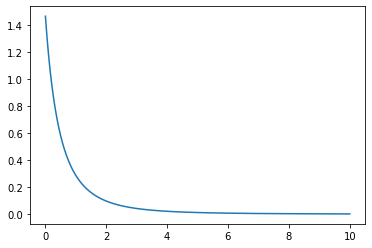

In [19]:
from sympy import exp, simplify, symbols
import numpy as np
import matplotlib.pyplot as plt

x = symbols("x")

func = (exp(-x) - 1) / (x + x**2)
der = func.diff(x)
der = simplify(der)
second_der = der.diff(x)
second_der = simplify(der)

x_array = np.linspace(0,10, 1000)
y_array = np.zeros_like(x_array)
for i in range(len(y_array)):
    y_array[i] = second_der.subs(x, x_array[i])

plt.plot(x_array, y_array)

Видно, что вторая производная достигает максимума около нуля, а также не превосходит двойки. Значит

$$
\max_{[0, M]}| f''(x)| (M - 0) \frac{h^2}{12} \le 2M \frac{h^2}{12} = \frac{Mh^2}{6}
$$

Ограничим ошибку интегрирования $\frac{\epsilon}{2}$, тогда неравенство на шаг:

$$
h \le \sqrt{\frac{\epsilon}{3M}} = \sqrt{\frac{10^{-3}}{6 * 10^{3}}} \approx 4 * 10^{-4}
$$

А теперь осталось лишь вычислить интеграл!

In [21]:
result = 0
x = 0
M = 2e3
step = 4e-4
previous_func = 1

def function(x):
    return (np.exp(-x) - 1) / (x + x**2)
    
while x <= M:
    x += step 
    next_func = function(x)
    result += (next_func + previous_func) / 2 * step
    previous_func = next_func

print(result)


    

-1.172663172282825


Точное значение интеграла может быть вычислено аналитически (не совсем - при помощи функции ошибок) и составит -1.17356...